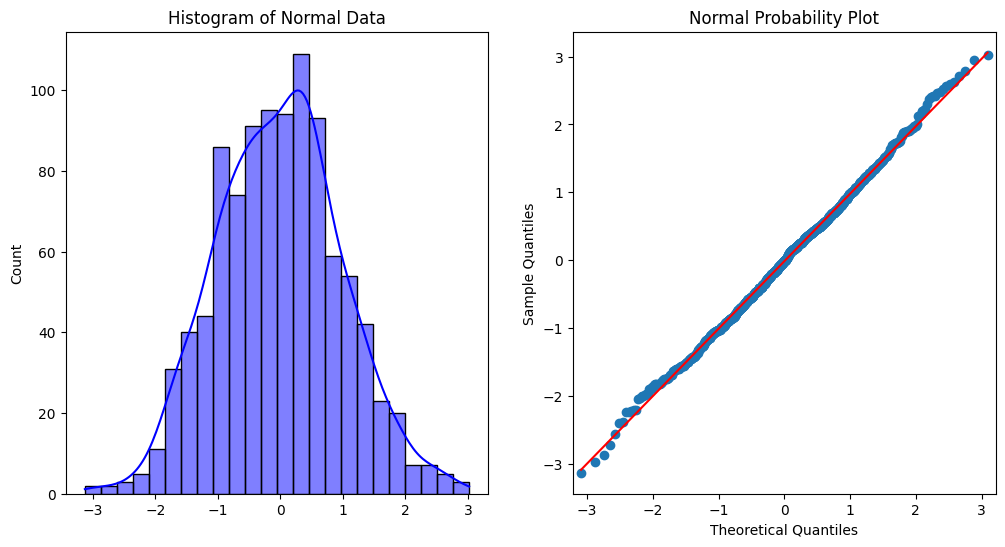

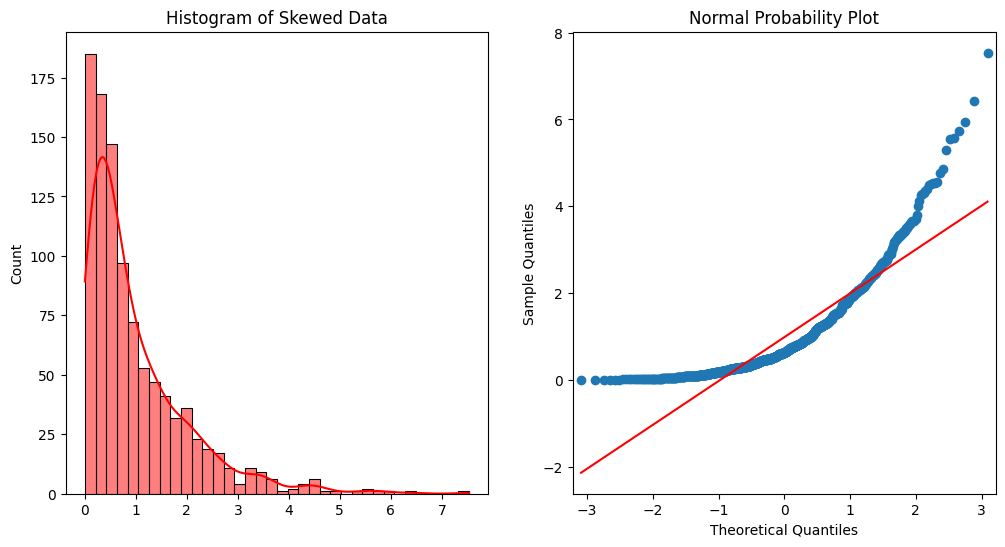

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.gofplots as sm
# Generate sample data
sample_size = 1000
normal_data = np.random.normal(size=sample_size)
skewed_data = np.random.exponential(size=sample_size)
# Plot for normal data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(normal_data, kde=True, color='blue', ax=ax[0])
sm.ProbPlot(normal_data).qqplot(line='s', ax=ax[1])
ax[0].set_title("Histogram of Normal Data")
ax[1].set_title("Normal Probability Plot")
# Plot for skewed data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(skewed_data, kde=True, color='red', ax=ax[0])
sm.ProbPlot(skewed_data).qqplot(line='s', ax=ax[1])
ax[0].set_title("Histogram of Skewed Data")
ax[1].set_title("Normal Probability Plot")
plt.show()

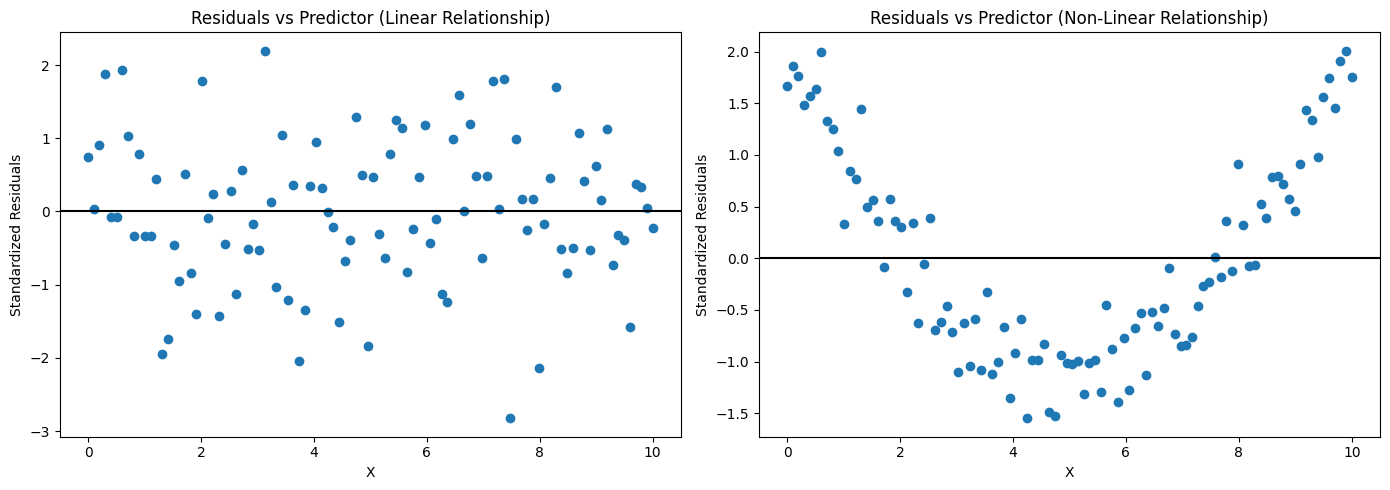

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# -----------------
# Generate data
# -----------------

# Linear relationship
np.random.seed(42)
X_linear = np.linspace(0, 10, 100)
y_linear = 3 * X_linear + 5 + np.random.normal(0, 2, 100)

# Non-linear relationship
X_nonlinear = np.linspace(0, 10, 100)
y_nonlinear = 2 * (X_nonlinear**2) - 5 * X_nonlinear + np.random.normal(0, 5, 100)

# -----------------
# Fit linear models
# -----------------

lin_reg = LinearRegression()
lin_reg.fit(X_linear.reshape(-1, 1), y_linear)
pred_linear = lin_reg.predict(X_linear.reshape(-1, 1))

lin_reg2 = LinearRegression()
lin_reg2.fit(X_nonlinear.reshape(-1, 1), y_nonlinear)
pred_nonlinear = lin_reg2.predict(X_nonlinear.reshape(-1, 1))

# -----------------
# Compute standardized residuals
# -----------------

std_res_linear = (y_linear - pred_linear) / np.std(y_linear - pred_linear)
std_res_nonlinear = (y_nonlinear - pred_nonlinear) / np.std(y_nonlinear - pred_nonlinear)

# -----------------
# Plotting
# -----------------

plt.figure(figsize=(14,5))

# Linear Plot
plt.subplot(1, 2, 1)
plt.scatter(X_linear, std_res_linear)
plt.axhline(0, color='black')
plt.title("Residuals vs Predictor (Linear Relationship)")
plt.xlabel("X")
plt.ylabel("Standardized Residuals")

# Non-linear Plot
plt.subplot(1, 2, 2)
plt.scatter(X_nonlinear, std_res_nonlinear)
plt.axhline(0, color='black')
plt.title("Residuals vs Predictor (Non-Linear Relationship)")
plt.xlabel("X")
plt.ylabel("Standardized Residuals")

plt.tight_layout()
plt.show()


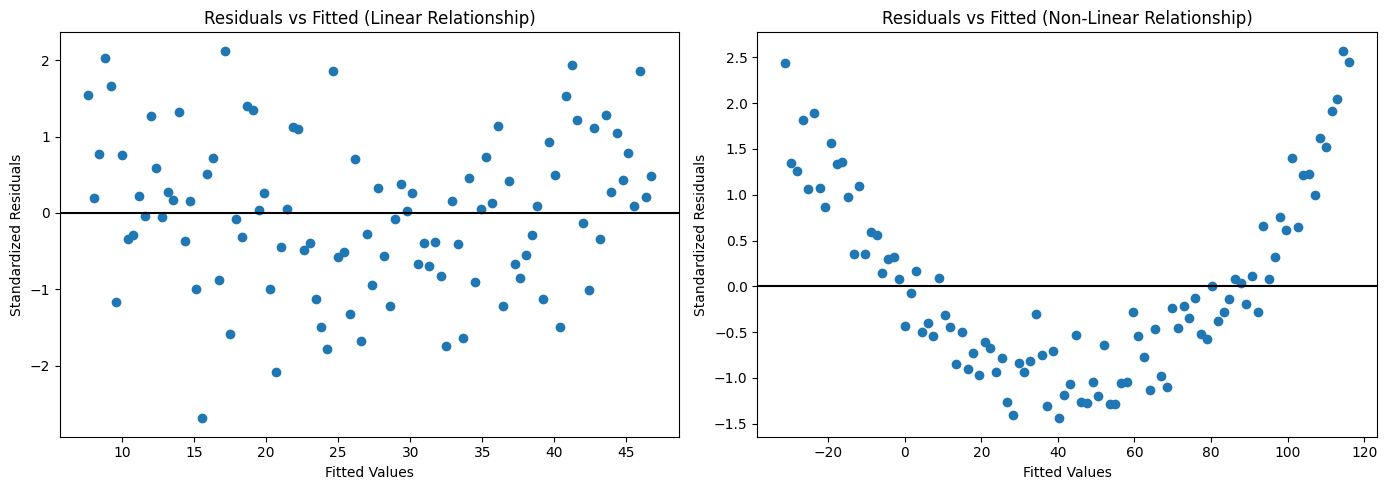

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ---------------------------
# Generate example data
# ---------------------------

# Linear data
np.random.seed(0)
X_linear = np.linspace(0, 10, 100)
y_linear = 4 * X_linear + 7 + np.random.normal(0, 3, 100)

# Non-linear data
X_nl = np.linspace(0, 10, 100)
y_nl = 2*(X_nl**2) - 5*X_nl + np.random.normal(0, 5, 100)

# ---------------------------
# Fit linear regression models
# ---------------------------

# Linear model
lin = LinearRegression().fit(X_linear.reshape(-1, 1), y_linear)
fit_linear = lin.predict(X_linear.reshape(-1, 1))
std_res_linear = (y_linear - fit_linear) / np.std(y_linear - fit_linear)

# Non-linear model (fit with linear regression)
lin2 = LinearRegression().fit(X_nl.reshape(-1, 1), y_nl)
fit_nl = lin2.predict(X_nl.reshape(-1, 1))
std_res_nl = (y_nl - fit_nl) / np.std(y_nl - fit_nl)

# ---------------------------
# Plot Standardized Residual vs Fitted Values
# ---------------------------

plt.figure(figsize=(14, 5))

# Linear case
plt.subplot(1, 2, 1)
plt.scatter(fit_linear, std_res_linear)
plt.axhline(0, color='black')
plt.title("Residuals vs Fitted (Linear Relationship)")
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")

# Non-linear case
plt.subplot(1, 2, 2)
plt.scatter(fit_nl, std_res_nl)
plt.axhline(0, color='black')
plt.title("Residuals vs Fitted (Non-Linear Relationship)")
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")

plt.tight_layout()
plt.show()


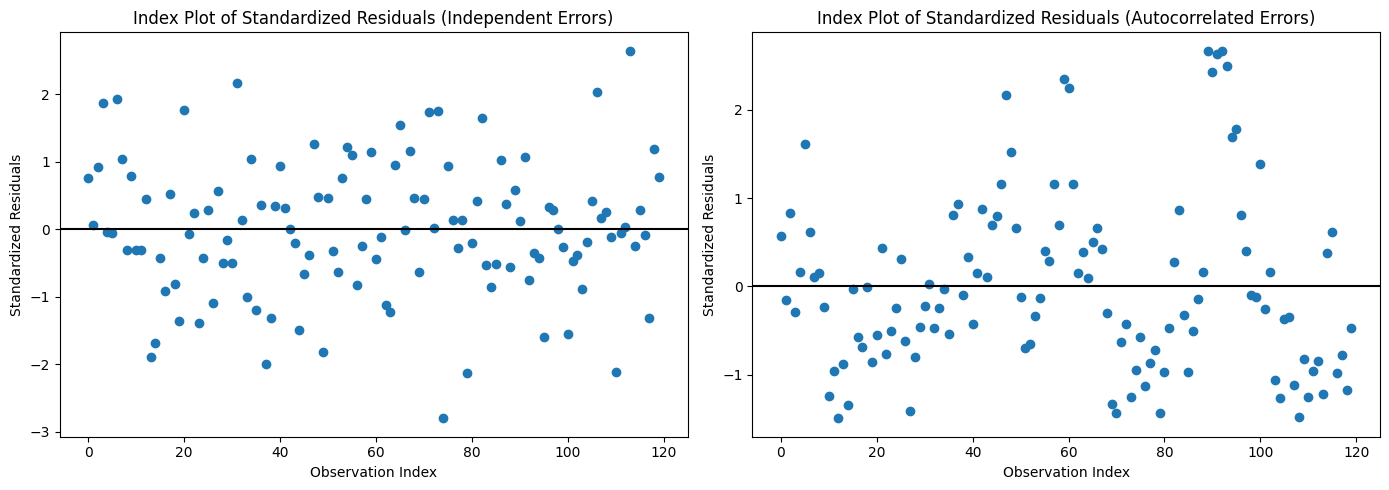

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# ------------------------
# Create example data
# ------------------------

n = 120
X = np.linspace(0, 10, n).reshape(-1, 1)

# --- Case 1: Independent Errors ---
eps_independent = np.random.normal(0, 2, n)
y_independent = 3 * X.flatten() + 10 + eps_independent

# --- Case 2: Autocorrelated Errors (AR(1)) ---
phi = 0.8   # strong correlation
eps_auto = np.zeros(n)
eps_auto[0] = np.random.normal(0, 2)

for i in range(1, n):
    eps_auto[i] = phi * eps_auto[i-1] + np.random.normal(0, 2)

y_auto = 3 * X.flatten() + 10 + eps_auto

# ------------------------
# Fit linear models
# ------------------------

lin = LinearRegression().fit(X, y_independent)
fit_ind = lin.predict(X)
std_res_ind = (y_independent - fit_ind) / np.std(y_independent - fit_ind)

lin2 = LinearRegression().fit(X, y_auto)
fit_auto = lin2.predict(X)
std_res_auto = (y_auto - fit_auto) / np.std(y_auto - fit_auto)

# ------------------------
# Plot Residual Index Plots
# ------------------------

plt.figure(figsize=(14, 5))

# Independent errors plot
plt.subplot(1, 2, 1)
plt.scatter(range(n), std_res_ind)
plt.axhline(0, color='black')
plt.title("Index Plot of Standardized Residuals (Independent Errors)")
plt.xlabel("Observation Index")
plt.ylabel("Standardized Residuals")

# Autocorrelated errors plot
plt.subplot(1, 2, 2)
plt.scatter(range(n), std_res_auto)
plt.axhline(0, color='black')
plt.title("Index Plot of Standardized Residuals (Autocorrelated Errors)")
plt.xlabel("Observation Index")
plt.ylabel("Standardized Residuals")

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# -------------------------------
# Example data (with a clear outlier)
# -------------------------------
X = np.array([1, 2, 3, 4, 5, 20])        # 20 is a high-leverage X-value
y = np.array([1, 2, 1.3, 3.75, 2.25, 8]) # also an outlier in Y

# Add constant term (intercept)
X_sm = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X_sm).fit()

# Obtain influence measures
influence = model.get_influence()

# Extract Cook's distance values
cooks_d, _ = influence.cooks_distance    # cooks_distance returns (values, p-values)

# -------------------------------
# Cook's Distance Plot
# -------------------------------
n = len(X)                     # number of observations
threshold = 4 / n              # rule-of-thumb cutoff

plt.figure(figsize=(8, 5))
plt.stem(range(n), cooks_d, use_line_collection=True, basefmt=" ")
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=1.3, 
            label=f"Threshold = 4/n = {threshold:.3f}")

plt.title("Cook's Distance Plot", fontsize=14)
plt.xlabel("Observation Index", fontsize=12)
plt.ylabel("Cook's Distance", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Print Cook's Distance Values
# -------------------------------
print("Cook's Distance values:")
for i, d in enumerate(cooks_d):
    print(f"  Observation {i}: {d:.4f}")

# Identify influential points
influential_points = np.where(cooks_d > threshold)[0]
print("\nInfluential observation indices (Cook's D > 4/n):", influential_points)


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 800x500 with 0 Axes>